In [1]:
graph = Import["projection_job(grouped_log_xp).graphml"];

In [ ]:
projection = GraphPlot[graph, VertexStyle -> Black, VertexSize -> Small, EdgeStyle -> Directive[Gray, Opacity[0.1]]]

In [ ]:
nodes = VertexList[graph];
centrality = DegreeCentrality[graph];

topIndices = Ordering[centrality, 20];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
degree = Grid[topNodos, Frame -> All]

GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [ ]:
Export["DegreeCentrality(inverse).csv", degree]

In [ ]:
centrality = EigenvectorCentrality[graph];

topIndices = Ordering[centrality, 20];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
eigenvector = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All]

GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [ ]:
Export["EigenvectorCentrality.csv", eigenvector]

In [ ]:
centrality = ClosenessCentrality[graph];

topIndices = Reverse@Ordering[centrality, -20];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
closeness = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All]


GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [ ]:
Export["ClosenessCentrality.csv", closeness, QuoteStrings -> False]

In [ ]:
centrality = BetweennessCentrality[graph];

topIndices = Reverse@Ordering[centrality, -20];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
betweenness = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All]


GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [ ]:
Export["BetweennessCentrality.csv", betweenness]

In [ ]:
N[GraphAssortativity[graph]]

-Graphics-
0.0754783
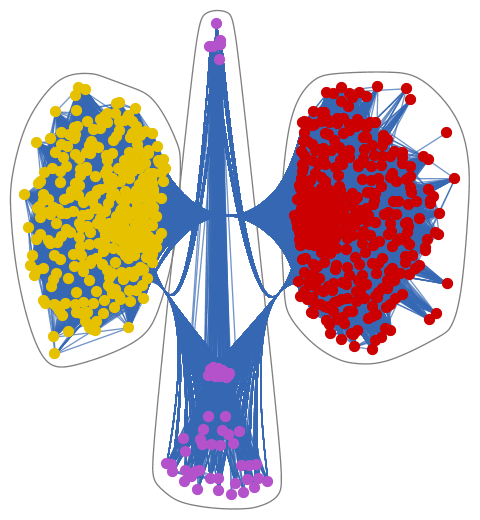

In [9]:
community = FindGraphCommunities[graph];
CommunityGraphPlot[graph, community]
N[GraphAssortativity[graph, community]]

In [ ]:
community[[3]]

In [ ]:
sorted = Sort[VertexDegree[graph]];
n = Length[sorted];
cdfData = Table[{sorted[[i]], i/n}, {i, n}];

ListPlot[cdfData, Joined -> True, 
 AxesLabel -> {"Grado", "CDF"}, 
 PlotMarkers -> Automatic, PlotStyle -> Blue]

In [ ]:
box = BoxWhiskerChart[VertexDegree[graph], 
 ChartLabels -> {"Degrees"}, 
 ChartStyle -> "Pastel"]

In [ ]:
grados = VertexDegree[graph];

Min[grados]         (* Grado mínimo *)
Max[grados]         (* Grado máximo *)
N[Mean[grados]]        (* Media *)
Median[grados]      (* Mediana *)
First[Commonest[grados]]   (* Moda: valor(es) más frecuente(s) *)
N[StandardDeviation[grados]]  (* Desviación estándar *)
Quantile[grados, 0.25]  (* Q1 *)
Quantile[grados, 0.75]  (* Q3 *)

In [ ]:
h = Show[
  Histogram[grados, Automatic, "PDF", ChartStyle -> "Pastel", AxesLabel -> {"Grado", "PDF"}],
  SmoothHistogram[grados, PlotStyle -> {Thick, Blue}]
]